<a href="https://colab.research.google.com/github/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/blob/master/1_modelo_nao_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#fazer um sistema de recomendacao com filmes pelo generos

1.   pegar os dados
2.   conhecendo os dados
1.   mudar os nomes, columns = ['
2.   extrair os dados passando dados para coulunas binarias, get_dummies
1.   junto os dois dataframe, pd.concat([
2.   gerar um escala/nivel de genero sendo um filmes mais de comedia doque animaçao, StandardScaler
1.   agrupar os filmes usando Cluesteriracao, KMeans
2.   Visualizar o centroids os grupos gerados e usar o SEABORN



o KMeans funciona, passa o numero de cluster, ele joga entao 3 pontos aleatorio chamado de centroids, calcula depois a distancia entre os 3 pontos, pega a metade do camilho e divide os dados dessa metade, recalcula a posição dos centroides os pontos para otimiza a a distancia dos dado realocando o centroides.

assim como redistribuir um hospital por regiao e bairro

- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- https://filosophy.org/writing/visual-algorithms-k-means-clustering/







In [1]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes_df = pd.read_csv(uri)

filmes_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
filmes_df.columns = ['filme_id', 'titulo', 'generos']
filmes_df.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
type(filmes_df)

pandas.core.frame.DataFrame

In [4]:
type(filmes_df.generos)

pandas.core.series.Series

In [5]:
filmes_df.generos.str

In [6]:
filmes_df.generos

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [7]:
filmes_df.generos.str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
generos_df = filmes_df.generos.str.get_dummies()
#axis eixo de concatenacao
dados_filmes_df = pd.concat([filmes_df, generos_df], axis=1)
dados_filmes_df.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#para escalar os dados usar a biblioteca de escalamento
from sklearn.preprocessing import StandardScaler

#treina o escalamneto
scaler = StandardScaler()
generos_escalados_ndarray = scaler.fit_transform(generos_df)

generos_escalados_ndarray

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [10]:
generos_escalados_ndarray.shape

(9742, 20)

In [11]:
#escalado Toy Story
print(generos_escalados_ndarray[53])
print(dados_filmes_df.loc[53])

[-0.05917995 -0.48060698  2.59101927 -0.25867916  3.69752441 -0.7921263
 -0.37463158 -0.21748944 -0.90024672  3.3920166  -0.09492563 -0.3340552
 -0.12839708 -0.18841895 -0.24998637 -0.44263346 -0.33443476 -0.49125897
 -0.20201972 -0.13206534]
filme_id                                              60
titulo                Indian in the Cupboard, The (1995)
generos                       Adventure|Children|Fantasy
(no genres listed)                                     0
Action                                                 0
Adventure                                              1
Animation                                              0
Children                                               1
Comedy                                                 0
Crime                                                  0
Documentary                                            0
Drama                                                  0
Fantasy                                                1
Film-Noir       

In [12]:
print(dados_filmes_df['Adventure'].sum())
print(dados_filmes_df['Children'].sum())
print(dados_filmes_df['Fantasy'].sum())

1263
664
779


In [13]:
#filter
print(dados_filmes_df[dados_filmes_df.generos == 'Adventure|Children|Fantasy'])

      filme_id                                             titulo  ... War  Western
1            2                                     Jumanji (1995)  ...   0        0
53          60                 Indian in the Cupboard, The (1995)  ...   0        0
109        126                  NeverEnding Story III, The (1994)  ...   0        0
767       1009                    Escape to Witch Mountain (1975)  ...   0        0
1514      2043          Darby O'Gill and the Little People (1959)  ...   0        0
1556      2093                                Return to Oz (1985)  ...   0        0
1617      2161                      NeverEnding Story, The (1984)  ...   0        0
1618      2162  NeverEnding Story II: The Next Chapter, The (1...  ...   0        0
1799      2399                      Santa Claus: The Movie (1985)  ...   0        0
3574      4896  Harry Potter and the Sorcerer's Stone (a.k.a. ...  ...   0        0
6075     41566  Chronicles of Narnia: The Lion, the Witch and ...  ...   0  

In [14]:
#agrupar os filmes usando Cluesteriracao - KMeans
from sklearn.cluster import KMeans

#criar um modele, passando o numero de grupos n_clusters
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados_ndarray)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
#imprimir os grupos, pegar os rotulos com labels
print('grupos {}'.format(modelo.labels_))

grupos [0 0 2 ... 2 0 2]


In [16]:
#o f é o format
print(f'grupos {modelo.labels_}')

grupos [0 0 2 ... 2 0 2]


In [17]:
print(generos_df.columns)
#centro de cada grupo
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.6500946   1.5907581   1.45710115  1.26190882 -0.05099364
  -0.31264629 -0.2104852  -0.59310403  1.05926094 -0.09492563 -0.23483305
   0.6085791   0.2272589  -0.15107252 -0.28740052  0.61094766 -0.34975563
  -0.06338323 -0.04802088]
 [-0.05917995  0.39028185 -0.19544288 -0.23580452 -0.26198711 -0.56510891
   0.88501136 -0.21338072  0.08383099 -0.16583387  0.2859946   0.41975919
  -0.06760303 -0.17669595  0.64756109 -0.31468801  0.08113456  1.45561922
  -0.11849702 -0.07290435]
 [ 0.03654163 -0.30029898 -0.28709518 -0.24087469 -0.18612433  0.23156758
  -0.27304964  0.1310944   0.10277572 -0.17728195 -0.08963118 -0.10974931
  -0.11262407  0.01688433 -0.2175259   0.18807976 -0.17104971 -0.48664411
 

In [18]:
#transformar em dataframe
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos_df.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.650095,1.590758,1.457101,1.261909,-0.050994,-0.312646,-0.210485,-0.593104,1.059261,-0.094926,-0.234833,0.608579,0.227259,-0.151073,-0.287401,0.610948,-0.349756,-0.063383,-0.048021
1,-0.059180,0.390282,-0.195443,-0.235805,-0.261987,-0.565109,0.885011,-0.213381,0.083831,-0.165834,0.285995,0.419759,-0.067603,-0.176696,0.647561,-0.314688,0.081135,1.455619,-0.118497,-0.072904
2,0.036542,-0.300299,-0.287095,-0.240875,-0.186124,0.231568,-0.273050,0.131094,0.102776,-0.177282,-0.089631,-0.109749,-0.112624,0.016884,-0.217526,0.188080,-0.171050,-0.486644,0.060586,0.039335


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e0683e2e8>,
      dtype=object)

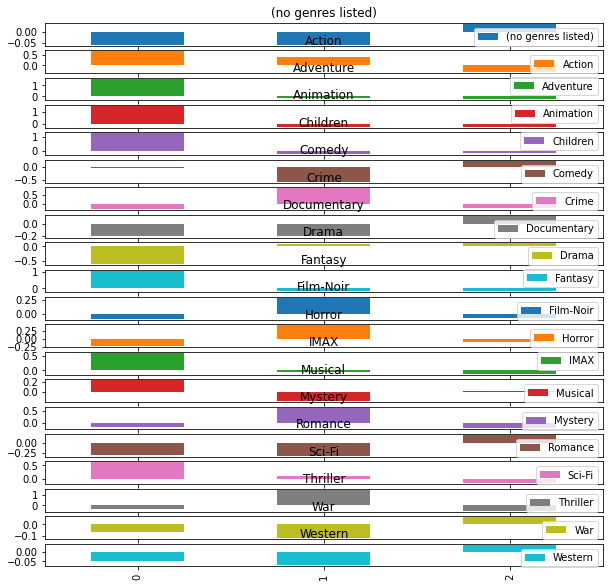

In [26]:
#um grafico pra cada grupo
grupos.plot.bar(subplots=True, figsize=(10,10), sharex=False)

In [27]:
#tranposicao de colunas
grupos.transpose()

,0,1,2
(no genres listed),-0.059180,-0.059180,0.036542
Action,0.650095,0.390282,-0.300299
Adventure,1.590758,-0.195443,-0.287095
Animation,1.457101,-0.235805,-0.240875
Children,1.261909,-0.261987,-0.186124
Comedy,-0.050994,-0.565109,0.231568
Crime,-0.312646,0.885011,-0.273050
Documentary,-0.210485,-0.213381,0.131094
Drama,-0.593104,0.083831,0.102776
Fantasy,1.059261,-0.165834,-0.177282


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e059965f8>,
      dtype=object)

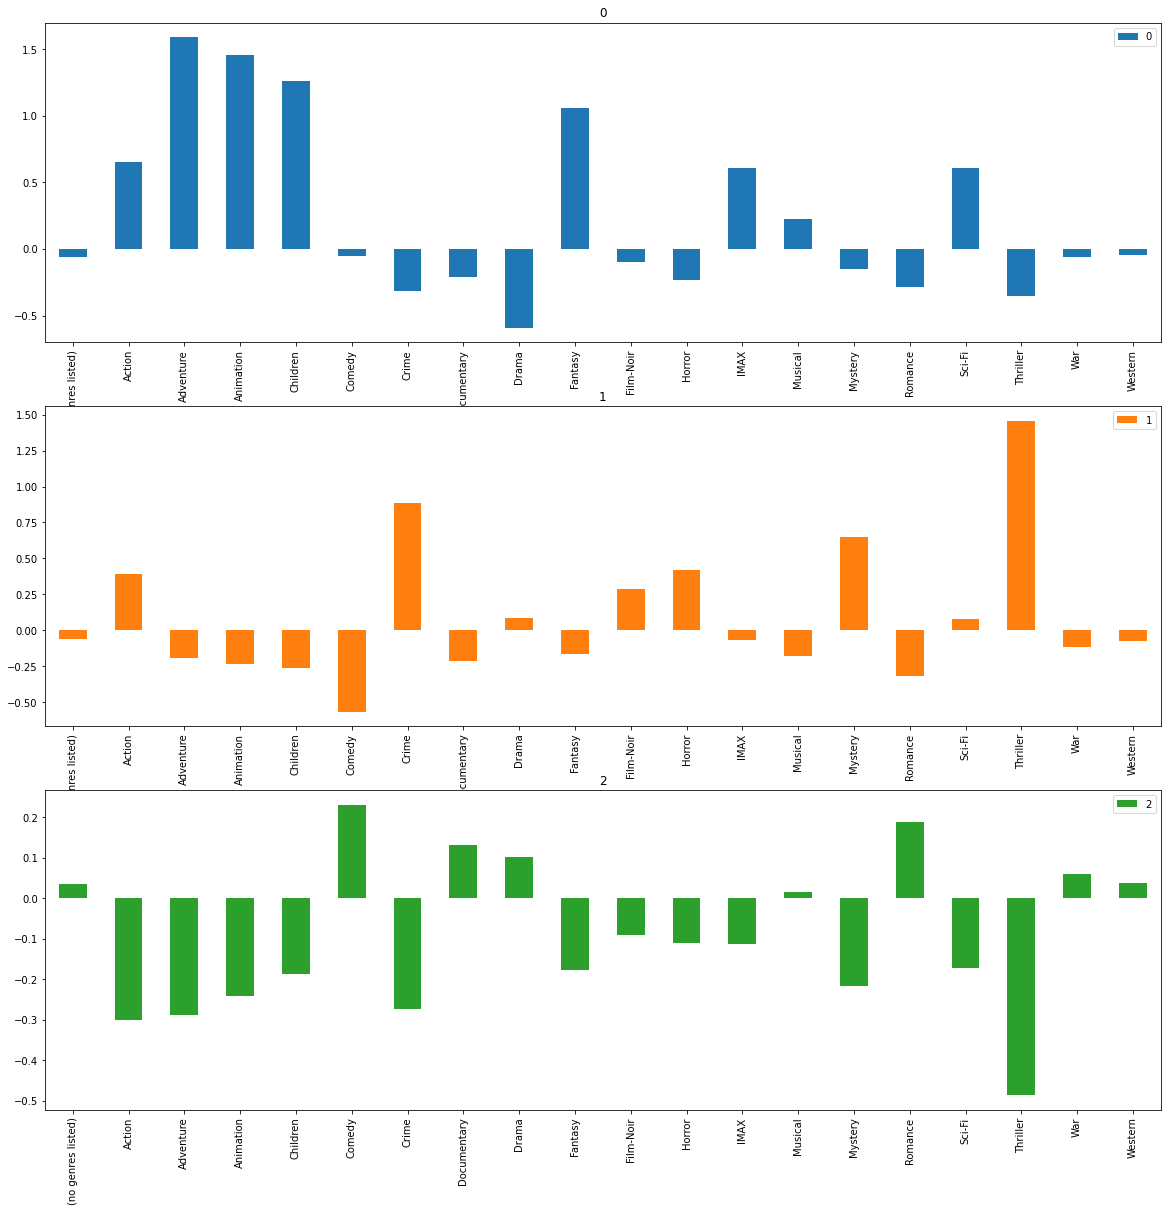

In [31]:
grupos.transpose().plot.bar(subplots=True, figsize=(20,20), sharex=False)

In [34]:
#fitrar o grupo
grupo = 0 
filtro = modelo.labels_ == grupo
dados_filmes_df[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8576,116941,Jetsons: The Movie (1990),Animation|Children|Comedy|Musical|Sci-Fi,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6313,48414,Open Season (2006),Adventure|Animation|Children|Comedy|IMAX,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2603,3479,Ladyhawke (1985),Adventure|Fantasy|Romance,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8930,136024,The Professional: Golgo 13 (1983),Action|Animation|Crime,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8659,121007,Space Buddies (2009),Adventure|Children|Fantasy|Sci-Fi,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6337,48982,Flushed Away (2006),Animation|Comedy,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7324,77561,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7550,85261,Mars Needs Moms (2011),Action|Adventure|Animation|Children|Comedy|Sci...,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
7866,94018,Battleship (2012),Action|Sci-Fi|Thriller|IMAX,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
7905,95165,Dragon Ball Z the Movie: The World's Strongest...,Action|Adventure|Animation|Sci-Fi|Thriller,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
